# Part I - Analyzing FordGoBike Data
## by Khaled Zoheir

## Introduction [Wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels)
> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

> In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
!pip install geopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from glob import glob
from geopy.geocoders import Nominatim

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Note: After starting, found out only Feb is there!
# Looked at knowledge base: https://knowledge.udacity.com/questions/668930
# Downloaded other months from: https://s3.amazonaws.com/baywheels-data/index.html
#df_bike_trips = pd.read_csv('201902-fordgobike-tripdata.csv')
#df_bike_trips.head()

In [3]:
all_months = glob('../*.csv')
print(len(all_months), all_months)

12 ['../201901-fordgobike-tripdata.csv', '../201902-fordgobike-tripdata.csv', '../201903-fordgobike-tripdata.csv', '../201904-fordgobike-tripdata.csv', '../201905-baywheels-tripdata.csv', '../201906-baywheels-tripdata.csv', '../201907-baywheels-tripdata.csv', '../201908-baywheels-tripdata.csv', '../201909-baywheels-tripdata.csv', '../201910-baywheels-tripdata.csv', '../201911-baywheels-tripdata.csv', '../201912-baywheels-tripdata.csv']


In [4]:
list_data_frame = [pd.read_csv(month, low_memory=False) for month in all_months]

In [5]:
print(type(list_data_frame))

<class 'list'>


In [6]:
df_bike_trips = pd.concat(list_data_frame, ignore_index=True)

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
# Basic df info
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [9]:
'''Note: The data for the 12 months that I am using do not contain: member_birth_year nor the member_gender as the one provided by Udacity'''

'Note: The data for the 12 months that I am using do not contain: member_birth_year nor the member_gender as the one provided by Udacity'

In [10]:
df_bike_trips.user_type.value_counts()

Subscriber    2021166
Customer       485817
Name: user_type, dtype: int64

In [11]:
df_bike_trips.bike_share_for_all_trip.value_counts()

No     2086152
Yes     177572
Name: bike_share_for_all_trip, dtype: int64

In [12]:
df_bike_trips.rental_access_method.value_counts()

app        108010
clipper     12828
Name: rental_access_method, dtype: int64

In [13]:
df_bike_trips.start_station_latitude.value_counts()

37.776619    45058
37.775880    42962
37.776598    40303
37.795392    39016
37.776639    36576
             ...  
37.777267        1
37.777267        1
37.777267        1
37.777268        1
37.811042        1
Name: start_station_latitude, Length: 74719, dtype: int64

In [14]:
# Let's start by understanding where are the stations on the map.
# We have the long and lat for each station. 
# For this will use goolge maps

# But before that, we need to clean any irrigular locations. I.e.: locations outside california
# For this we will use the geopy.geocoders library

# Note: We cannot loop on all records and call the geo info for that location. Instead we will create a new df: df_stations and use it.

In [15]:
# Test the geopy.geocoders library
# Ref: https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/
# Select random records 10:
df_sample = df_bike_trips.sample(2)

In [16]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")
# Display
for index, row in df_sample.iterrows():
    #print(row, type(row))
    location = geolocator.reverse(str(row['start_station_latitude'])+","+str(row['start_station_longitude']))
    address = location.raw['address']

    # traverse the data
    neighbourhood = address.get('neighbourhood', '')
    city = address.get('city', '')
    county = address.get('county', '')
    state = address.get('state', '')
    country = address.get('country', '')
    code = address.get('country_code')
    zipcode = address.get('postcode')
    print(f'Station:{row.start_station_name}')
    print(f'\t\tAddress:{address}')
    print('\tNeighbourhood : ', neighbourhood)
    print('\tCity : ', city)
    print('\tState : ', state)
    print('\tCountry : ', country)
    print('\tZip Code : ', zipcode)

Station:Rhode Island St at 17th St
		Address:{'shop': 'Whole Foods Market', 'house_number': '450', 'road': 'Rhode Island Street', 'neighbourhood': 'Potrero Hill', 'city': 'San Francisco', 'state': 'California', 'ISO3166-2-lvl4': 'US-CA', 'postcode': '94107', 'country': 'United States', 'country_code': 'us'}
	Neighbourhood :  Potrero Hill
	City :  San Francisco
	State :  California
	Country :  United States
	Zip Code :  94107
Station:nan
		Address:{'house_number': '475', 'road': 'Brannan Street', 'neighbourhood': 'South Beach', 'city': 'San Francisco', 'state': 'California', 'ISO3166-2-lvl4': 'US-CA', 'postcode': '94107', 'country': 'United States', 'country_code': 'us'}
	Neighbourhood :  South Beach
	City :  San Francisco
	State :  California
	Country :  United States
	Zip Code :  94107


In [17]:
# Ok, A station is defined mainly by: lat, lon. We will not depend on station id or name
# Let's first clean some records (drop) that do not contain good lat.long values
# and creat an intermediate df: df_trips: from - to
df_bike_trips.dropna(subset=['start_station_id' , 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)
df_bike_trips.drop(df_bike_trips[(df_bike_trips.start_station_latitude == 0.0) | (df_bike_trips.start_station_longitude == 0.0) | (df_bike_trips.end_station_latitude == 0.0) | (df_bike_trips.end_station_longitude == 0.0) ].index, inplace = True)

df_trips = df_bike_trips[['start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude']].drop_duplicates()

In [18]:
df_trips.shape

(52328, 8)

In [19]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52328 entries, 0 to 2506217
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_station_id         52328 non-null  float64
 1   start_station_name       52328 non-null  object 
 2   start_station_latitude   52328 non-null  float64
 3   start_station_longitude  52328 non-null  float64
 4   end_station_id           52328 non-null  float64
 5   end_station_name         52328 non-null  object 
 6   end_station_latitude     52328 non-null  float64
 7   end_station_longitude    52328 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.6+ MB


In [20]:
print(df_trips.shape)
print(type(df_trips))
df_trips.head()

(52328, 8)
<class 'pandas.core.frame.DataFrame'>


,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
0,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628
2,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376
3,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777
4,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098


In [21]:
# The trip is from station to station. Let's get the stations: df_stations:
dict_start = {'start_station_id': 'station_id',
        'start_station_name': 'station_name',
        'start_station_latitude': 'station_latitude',
        'start_station_longitude': 'station_longitude'}
df_start_stations = df_trips.iloc[:,0:4]
df_start_stations.rename(columns=dict_start, inplace=True)

dict_end = {'end_station_id': 'station_id',
        'end_station_name': 'station_name',
        'end_station_latitude': 'station_latitude',
        'end_station_longitude': 'station_longitude'}
df_end_stations = df_trips.iloc[:,4:8]
df_end_stations.rename(columns=dict_end, inplace=True)

In [22]:
df_stations = pd.concat([df_start_stations, df_end_stations], ignore_index=True) # Add to it the end stations
df_stations.drop_duplicates(inplace = True)
print(type(df_stations))
df_stations.head()

<class 'pandas.core.frame.DataFrame'>


,station_id,station_name,station_latitude,station_longitude
0,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037
1,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915
2,245.0,Downtown Berkeley BART,37.870139,-122.268422
3,85.0,Church St at Duboce Ave,37.770083,-122.429156
4,16.0,Steuart St at Market St,37.794130,-122.394430


In [23]:
print(len(df_stations.station_latitude.unique()))
print(len(df_stations.station_longitude.unique()))
print(len(df_stations.station_name.unique()))
print(len(df_stations.station_id.unique()))

print(len(df_stations.iloc[:,[2,3]].value_counts()))


455
456
443
433
456


In [24]:
# We were hoping to get the same numbers above. These are stations names written slightly different 
# or with slightly different (lat, long) info.
# We will ignore this. It's best to clean. But we will ignore it. A stations will be defined by (lat, long)

df_stations.shape

(459, 4)

In [25]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 51751
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         459 non-null    float64
 1   station_name       459 non-null    object 
 2   station_latitude   459 non-null    float64
 3   station_longitude  459 non-null    float64
dtypes: float64(3), object(1)
memory usage: 17.9+ KB


In [26]:
# Now, we can add to the station more info: State, City and neighbourhood
geolocator_file = "all_stations_unclean.csv" # This file includes ALL stations
import os.path
os.path.exists(geolocator_file)

True

In [27]:
# Let's add: state, city and neighbourhood
# Note: It takes some time to run the following on all stations. Run once and save.
def g_address_info(lat, lon):
    location = geolocator.reverse(str(lat)+","+str(lon))
    address = location.raw['address']
    state = address.get('state', '')
    city = address.get('city', '')
    neighbourhood = address.get('neighbourhood', '')
    return pd.Series([state, city, neighbourhood])
if os.path.exists(geolocator_file): # If the file exists, then load it
    print("Stations files already there")
    df_stations = pd.read_csv(geolocator_file)
else:
    print("Creating stations files")
    df_stations[['state','city','neighbourhood']] = df_stations.apply(lambda x: g_address_info(x["station_latitude"], x["station_longitude"]), axis=1)
    df_stations.to_csv(df_stations.to_csv(geolocator_file))
df_stations.info()

Stations files already there
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         459 non-null    int64  
 1   station_id         459 non-null    float64
 2   station_name       459 non-null    object 
 3   station_latitude   459 non-null    float64
 4   station_longitude  459 non-null    float64
 5   state              459 non-null    object 
 6   city               447 non-null    object 
 7   neighbourhood      362 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 28.8+ KB


In [28]:
df_stations.state.value_counts()

California      457
Québec            1
Pennsylvania      1
Name: state, dtype: int64

In [29]:
# Wow, interesting. There are two wrong records: Quebec and Pennsylvania... 
# Get the station name for those and delete corresponding records

In [30]:
df_stations[df_stations['state'] != 'California']

,Unnamed: 0,station_id,station_name,station_latitude,station_longitude,state,city,neighbourhood
378,38498,408.0,MTL-ECO5-01,45.510000,-73.570000,Québec,Montréal,Quartier des Spectacles
452,50316,484.0,Philly Demo,39.892567,-75.173714,Pennsylvania,Philadelphia,NaN


In [31]:
# From above we need to delete all records with station_latitude > 38
# Let's confirm:
df_stations[df_stations['station_latitude'] > 38]

,Unnamed: 0,station_id,station_name,station_latitude,station_longitude,state,city,neighbourhood
378,38498,408.0,MTL-ECO5-01,45.510000,-73.570000,Québec,Montréal,Quartier des Spectacles
452,50316,484.0,Philly Demo,39.892567,-75.173714,Pennsylvania,Philadelphia,NaN


In [32]:
df_stations.drop(df_stations[df_stations['station_latitude'] > 38].index, inplace = True)
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 458
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         457 non-null    int64  
 1   station_id         457 non-null    float64
 2   station_name       457 non-null    object 
 3   station_latitude   457 non-null    float64
 4   station_longitude  457 non-null    float64
 5   state              457 non-null    object 
 6   city               445 non-null    object 
 7   neighbourhood      361 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 32.1+ KB


In [33]:
df_stations.to_csv(df_stations.to_csv("all_stations.csv")) # This is the cleaned file.
df_stations.shape

(457, 8)

In [34]:
# What about the cities? How many do we have?
df_stations.city.value_counts()

San Francisco    231
San Jose          93
Oakland           83
Berkeley          38
Name: city, dtype: int64

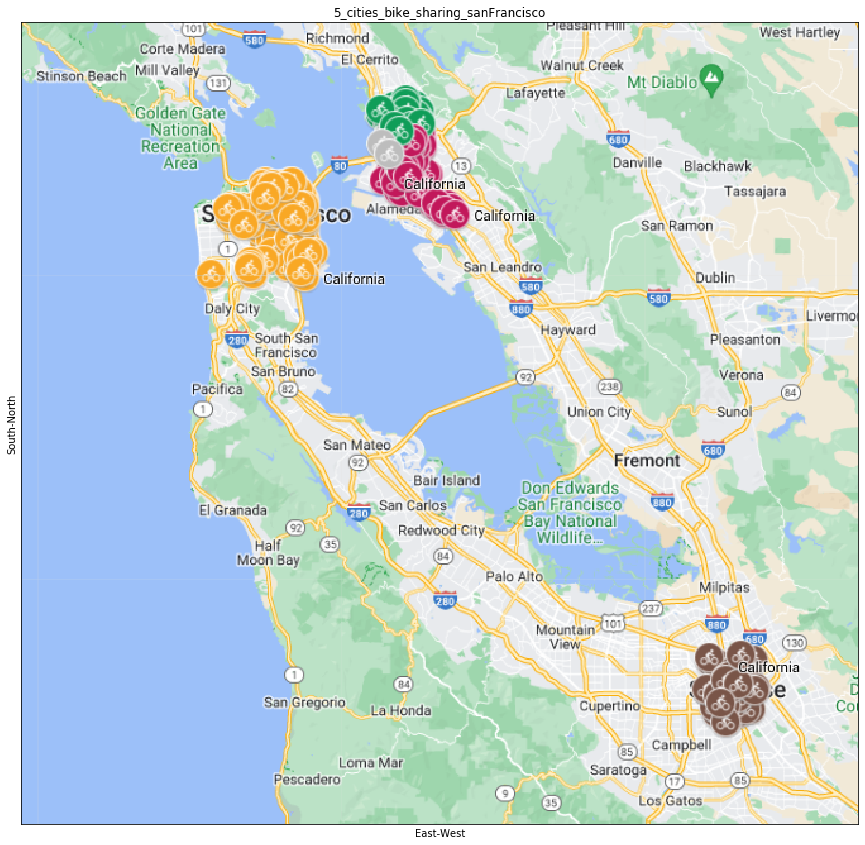

In [35]:
# We have 4 cities and some nulls!
# Great, now we can use the generated file to get an image from my google maps
# Using Google mymaps: https://www.google.com/maps/d/

import cv2
def plot_img(file, title):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))
    plt.title(title)
    plt.xlabel("East-West")
    plt.ylabel("South-North")
    plt.xlabel("East-West")
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show() 
plot_img('5_cities_bike_sharing_sanFrancisco.png', '5_cities_bike_sharing_sanFrancisco')

In [36]:
# Apprently we have 5 cities in California: San Francisco, San Jose, Oakland, Berkeley and unammed city 
# (gray icons - The NULL values)!
# By looking at the map again (see below). The fifth city (not detected by geolocator) is: Emerville

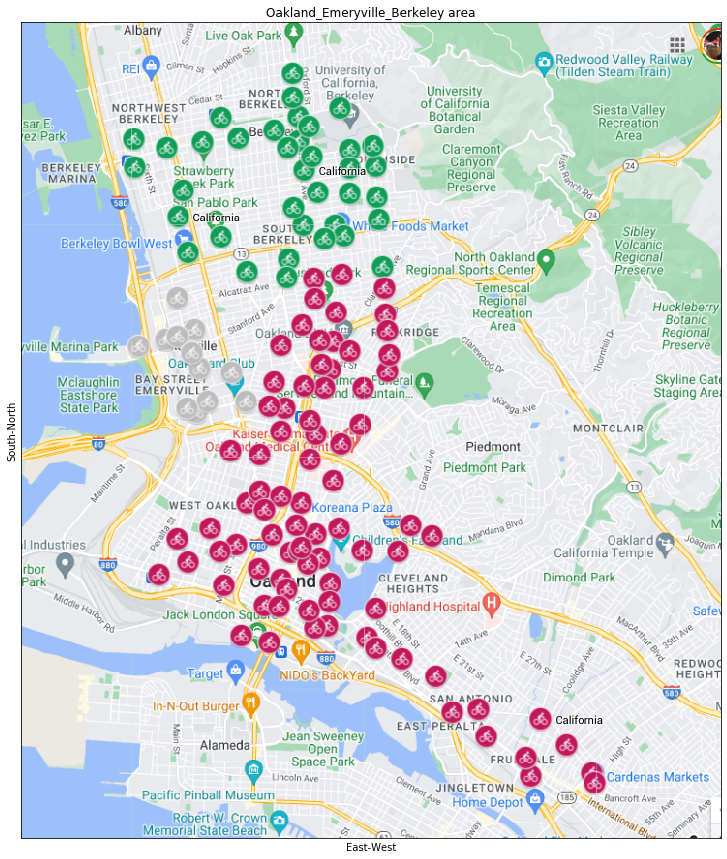

In [37]:
# And a more clear image for Oakland, Emeryville and Berkeley cities - The three adjacent cities
plot_img('Oakland_Emeryville_Berkeley.png', 'Oakland_Emeryville_Berkeley area')

In [38]:
df_bike_trips['start_station_name'].value_counts().nlargest(6)

Market St at 10th St                                         44768
Berry St at 4th St                                           42563
San Francisco Caltrain (Townsend St at 4th St)               40148
San Francisco Ferry Building (Harry Bridges Plaza)           38717
San Francisco Caltrain Station 2  (Townsend St at 4th St)    36270
Montgomery St BART Station (Market St at 2nd St)             35862
Name: start_station_name, dtype: int64

In [39]:
df_bike_trips['end_station_name'].value_counts().nlargest(6)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    51793
San Francisco Caltrain (Townsend St at 4th St)               50769
San Francisco Ferry Building (Harry Bridges Plaza)           47925
Montgomery St BART Station (Market St at 2nd St)             47678
Market St at 10th St                                         43987
Berry St at 4th St                                           41843
Name: end_station_name, dtype: int64

In [40]:
df_tmp = df_bike_trips['start_station_name'].value_counts().nlargest(6).reset_index()
most_frequent_stations= list(df_tmp.iloc[:,0])
most_frequent_stations

['Market St at 10th St',
 'Berry St at 4th St',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Montgomery St BART Station (Market St at 2nd St)']

In [41]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407190 entries, 0 to 2506660
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 293.8+ MB


In [42]:
'''Now we have 3 dataframes: df_bike_trips, df_trip and df_stations'''

'Now we have 3 dataframes: df_bike_trips, df_trip and df_stations'

### What is the structure of your dataset?

* Iit contains 2506983 trips and 15 columns/features:
* It contains info about: The trip, trip time, user, bike:
* * The trip: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`
* * Trip time:`start_time`, `end_time` and `duration_sec` (redundent - may need to check for consistency)
* * User: `user_type`, `rental_access_method`, `bike_share_for_all_trip`
* * Bike: `bike_id`

We can derive some more info from above: 
* * `day_of_the_year`: This could be useful to see if there are certain days of importance. (taken from: `start_time`)
* * `hour_of_day`
* * `day_of_week`
* * `month`
* * `duration_min`
* * `ground_distance`: While it's not easy to get the actual biking distane, we can still get a distance that we can compare: The ground distance between: Start and end stations using: `start_station_latitude`, `start_station_longitude`, `end_station_latitude` and `end_station_longitude`: Ref: (https://www.geeksforgeeks.org/program-distance-two-points-earth/)
* * `start_state`, `start_city`, `start_neighbourhood` and same for `end`:
We got those from: `start_station_latitude`, `start_station_longitude` using the `geopy` lib. Ref: (https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/) 

### What is/are the main feature(s) of interest in your dataset?

* Most of the features are of interest. May be less interested in: `bike_share_for_all_trip`
* I am mainly interested in finding which time (day of the week, etc) Is the most time of using the service and which is the low time. This is useful to provide a better servie
* I am also interested in finding the usual distance travelled. Shortest and longest.
* Finally, do riders always go from a specific station to another or is it totally random. This is very useful as we may need to transport the bikes to the start stations.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* Almost all except: `bike_share_for_all_trip` and stations names

## Data Cleaning

In [43]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407190 entries, 0 to 2506660
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 293.8+ MB


In [44]:
print(df_bike_trips.shape)
df_bike_trips.isnull().sum()

(2407190, 15)


duration_sec                     0
start_time                       0
end_time                         0
start_station_id                 0
start_station_name               0
start_station_latitude           0
start_station_longitude          0
end_station_id                   0
end_station_name                 0
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     144260
rental_access_method       2385331
dtype: int64

In [45]:
'''Some fileds are missing station information: start_station_id, start_station_name, end_station_id or end_station_name. We can delete those records'''

'Some fileds are missing station information: start_station_id, start_station_name, end_station_id or end_station_name. We can delete those records'

In [46]:
# This is alreay done before. No harm to call it again
df_bike_trips[(df_bike_trips['start_station_id'].isnull() | df_bike_trips['start_station_name'].isnull() | df_bike_trips['end_station_id'].isnull() | df_bike_trips['end_station_name'].isnull())]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method


In [47]:
df_bike_trips.dropna(subset=['start_station_id' , 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)

In [48]:
# We should no longer have nulls for stations
df_bike_trips.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id                 0
start_station_name               0
start_station_latitude           0
start_station_longitude          0
end_station_id                   0
end_station_name                 0
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     144260
rental_access_method       2385331
dtype: int64

#### Some data types issues:

1- time fileds: start_time and end_time: should be datetime type

2- Id fields: start_station_id, end_station_id and bike_id: Should be non-numeric. We will do any mathematical operations on them. They should be string

3- Category fields: user_type and rental_access_method

4- bike_share_for_all_trip: Should be boolean. We wil leave it as it contains null and it will not be used in the analysis

In [49]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407190 entries, 0 to 2506660
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 293.8+ MB


In [50]:
df_bike_trips['start_time'] = pd.to_datetime(df_bike_trips['start_time'])
df_bike_trips['end_time'] = pd.to_datetime(df_bike_trips['end_time'])

df_bike_trips['start_station_id'] = df_bike_trips['start_station_id'].astype('str')
df_bike_trips['end_station_id'] = df_bike_trips['end_station_id'].astype('str')
df_bike_trips['bike_id'] = df_bike_trips['bike_id'].astype('str')

df_bike_trips['user_type'] = df_bike_trips['user_type'].astype('category')
df_bike_trips['rental_access_method'] = df_bike_trips['rental_access_method'].astype('category')


In [51]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407190 entries, 0 to 2506660
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     category      
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 261.7+ MB


In [52]:
df_bike_trips.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id                 0
start_station_name               0
start_station_latitude           0
start_station_longitude          0
end_station_id                   0
end_station_name                 0
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     144260
rental_access_method       2385331
dtype: int64

In [53]:
'''Let's see if there are duplicates'''
df_bike_trips.duplicated().sum()

0

In [54]:
'''No duplicates - nothing to clean'''

'No duplicates - nothing to clean'

In [55]:
''''Now let's add some new fields'''

"'Now let's add some new fields"

In [56]:
#* * `day_of_the_year`: This could be useful to see if there are certain days of importance. (taken from: `start_time`)
#* * `hour_of_day`
#* * `day_of_week`
#* * `working_day`, A boolean indicating of it's a working day (True) or a weekend (False)
#* * `month`
#* * `ground_distance`: While it's not easy to get the actual biking distane, we can still get a distance that we can compare: The ground distance between: Start and end stations using: `start_station_latitude`, `start_station_longitude`, `end_station_latitude` and `end_station_longitude`: Ref: (https://www.geeksforgeeks.org/program-distance-two-points-earth/)
#* * `start_neighbourhood` and `end_neighbourhood`
df_bike_trips['day_of_the_year'] = df_bike_trips['start_time'].dt.dayofyear
df_bike_trips['hour_of_day'] = df_bike_trips['start_time'].dt.hour
df_bike_trips['day_of_week'] = df_bike_trips['start_time'].dt.dayofweek
df_bike_trips['working_day'] = np.where(df_bike_trips['start_time'].dt.dayofweek < 5, True, False)
df_bike_trips['month'] = df_bike_trips['start_time'].dt.month
df_bike_trips['duration_min'] = df_bike_trips['duration_sec']/60


In [57]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407190 entries, 0 to 2506660
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     category      
 15  day_of_the_year          int64         
 16  hour_of_day              int64         
 17  day_of_week              in

In [58]:
# The following cells are to create: `ground_distance`, `start_neighbourhood` and `end_neighbourhood` in an efficient way

print(f'Number of unique start stations: {len(df_bike_trips.start_station_id.unique())}')
print(f'Number of unique end stations: {len(df_bike_trips.end_station_id.unique())}')

Number of unique start stations: 433
Number of unique end stations: 433


In [59]:
# Some stations do not have lat and long info. Let's find out how many records
len(df_bike_trips[(df_bike_trips.start_station_latitude == 0.0) | (df_bike_trips.start_station_longitude == 0.0) | (df_bike_trips.end_station_latitude == 0.0) | (df_bike_trips.end_station_longitude == 0.0) ])

0

In [60]:
# None/ We already removed them

Let's add the new columns in the df_bike_trips: 
`ground_distance`, 
The following could be also added. However, they were already used and we cleaned our data (stations outside California) and the `df_stations` is there to get specific info if needed
`start_state` , `end_state`,
`start_city` , `end_city`,
`start_neighbourhood` , `end_neighbourhood`

In [61]:
df_bike_trips.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip', 'rental_access_method', 'day_of_the_year',
       'hour_of_day', 'day_of_week', 'working_day', 'month', 'duration_min'],
      dtype='object')

In [62]:
df_trips.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude'],
      dtype='object')

In [63]:
df_stations.columns

Index(['Unnamed: 0', 'station_id', 'station_name', 'station_latitude',
       'station_longitude', 'state', 'city', 'neighbourhood'],
      dtype='object')

In [64]:
from math import radians, cos, sin, asin, sqrt
def g_distance(lat1, lat2, lon1, lon2):
    # The math module contains a function named
    # radians which converts from degrees to radians.

    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

df_bike_trips['ground_distance'] = df_bike_trips.apply(lambda x: g_distance(x["start_station_latitude"], x["end_station_latitude"], x["start_station_longitude"], x["end_station_longitude"]), axis=1)


In [65]:
# Correct types
df_bike_trips['day_of_the_year'] = df_bike_trips['day_of_the_year'].astype('category')
#df_bike_trips['hour_of_day'] = df_bike_trips['hour_of_day'].astype('category') # This is better to be left as numeric
df_bike_trips['day_of_week'] = df_bike_trips['day_of_week'].astype('category')
df_bike_trips['working_day'] = df_bike_trips['working_day'].astype('bool')
df_bike_trips['month'] = df_bike_trips['month'].astype('category')

In [66]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407190 entries, 0 to 2506660
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  object        
 14  rental_access_method     category      
 15  day_of_the_year          category      
 16  hour_of_day              int64         
 17  day_of_week              ca

In [67]:
'''Drop not unused column'''
#df_bike_trips.drop(['bike_share_for_all_trip'], inplace =True, axis=1)
df_bike_trips.drop(['duration_sec'], inplace =True, axis=1)

In [68]:
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407190 entries, 0 to 2506660
Data columns (total 21 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         object        
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           object        
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  object        
 11  user_type                category      
 12  bike_share_for_all_trip  object        
 13  rental_access_method     category      
 14  day_of_the_year          category      
 15  hour_of_day              int64         
 16  day_of_week              category      
 17  working_day              bo

### Now that we have a clean dataset. Let's merge the state, city and neighbourhood info and save it to one single csv

In [69]:
df_stations_short = df_stations[['station_latitude', 'station_longitude', 'state', 'city', 'neighbourhood']]
df_stations_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 458
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_latitude   457 non-null    float64
 1   station_longitude  457 non-null    float64
 2   state              457 non-null    object 
 3   city               445 non-null    object 
 4   neighbourhood      361 non-null    object 
dtypes: float64(2), object(3)
memory usage: 21.4+ KB


In [70]:
df_bike_trips.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'bike_share_for_all_trip',
       'rental_access_method', 'day_of_the_year', 'hour_of_day', 'day_of_week',
       'working_day', 'month', 'duration_min', 'ground_distance'],
      dtype='object')

In [71]:
df_bike_trips = pd.merge(df_bike_trips, df_stations_short, how='left', left_on = ['start_station_latitude', 'start_station_longitude'], right_on = ['station_latitude', 'station_longitude'])
df_bike_trips.rename(columns={"state": "start_state", "city": "start_city", "neighbourhood": "start_neighbourhood"}, inplace=True)
df_bike_trips.drop(columns=['station_latitude', 'station_longitude'], axis=1, inplace=True)
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2417333 entries, 0 to 2417332
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         object        
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           object        
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  object        
 11  user_type                category      
 12  bike_share_for_all_trip  object        
 13  rental_access_method     category      
 14  day_of_the_year          category      
 15  hour_of_day              int64         
 16  day_of_week              category      
 17  working_day              bo

In [72]:
df_bike_trips = pd.merge(df_bike_trips, df_stations_short, how='left', left_on = ['end_station_latitude', 'end_station_longitude'], right_on = ['station_latitude', 'station_longitude'])
df_bike_trips.rename(columns={"state": "end_state", "city": "end_city", "neighbourhood": "end_neighbourhood"}, inplace=True)
df_bike_trips.drop(columns=['station_latitude', 'station_longitude'], axis=1, inplace=True)
df_bike_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2426322 entries, 0 to 2426321
Data columns (total 27 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_time               datetime64[ns]
 1   end_time                 datetime64[ns]
 2   start_station_id         object        
 3   start_station_name       object        
 4   start_station_latitude   float64       
 5   start_station_longitude  float64       
 6   end_station_id           object        
 7   end_station_name         object        
 8   end_station_latitude     float64       
 9   end_station_longitude    float64       
 10  bike_id                  object        
 11  user_type                category      
 12  bike_share_for_all_trip  object        
 13  rental_access_method     category      
 14  day_of_the_year          category      
 15  hour_of_day              int64         
 16  day_of_week              category      
 17  working_day              bo

In [73]:
df_bike_trips.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'bike_id', 'user_type', 'bike_share_for_all_trip',
       'rental_access_method', 'day_of_the_year', 'hour_of_day', 'day_of_week',
       'working_day', 'month', 'duration_min', 'ground_distance',
       'start_state', 'start_city', 'start_neighbourhood', 'end_state',
       'end_city', 'end_neighbourhood'],
      dtype='object')

In [101]:
df_bike_trips.to_csv("master_bikes_dataset.csv", index=False)

## Univariate Exploration

In [75]:
'''In the following cells I will be displaying a bar graph for different features. Let's have a function that does this for us'''

"In the following cells I will be displaying a bar graph for different features. Let's have a function that does this for us"

   #### Let's see the distribution over the months

In [76]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
week_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
global_sample = False # If True it will display a sample of the data for program syntax testing. If False will work with the whole dataframe
def bar_graph_single_feature (df, feature, suptitle, x_label, xticks = "", color_palette =4, sample=False):
    base_color = sb.color_palette()[color_palette]
    graph = sb.catplot(data = (df if sample == False else df.sample(n=100)), x = feature, kind = 'count', aspect = 1.7, color = base_color);

    graph.set_axis_labels(x_label, 'Number of Bike Trips'),

    graph.fig.suptitle(suptitle, y = 1.05, fontsize = 16, fontweight = 'bold')

    if (xticks!= ''):
        graph.set_xticklabels(xticks, rotation=75)

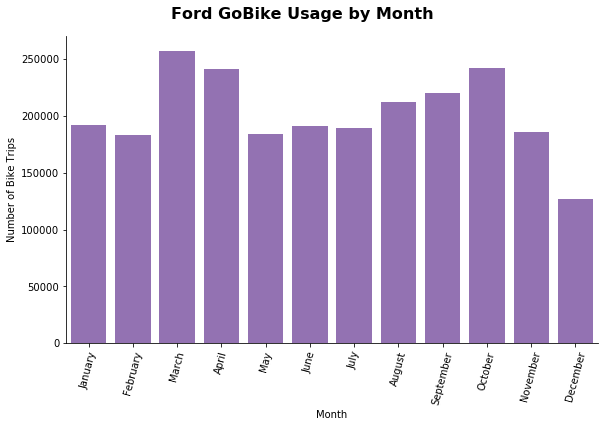

In [77]:
bar_graph_single_feature (df_bike_trips, 'month', 'Ford GoBike Usage by Month', 'Month', months, sample=global_sample)

Surprisingly! The summer is not the highest utilization. May be it's too hot for biking.
The highst months are spring and autumn months. Not too cold and not too hot apparently

   #### Let's see the distribution over the weekdays

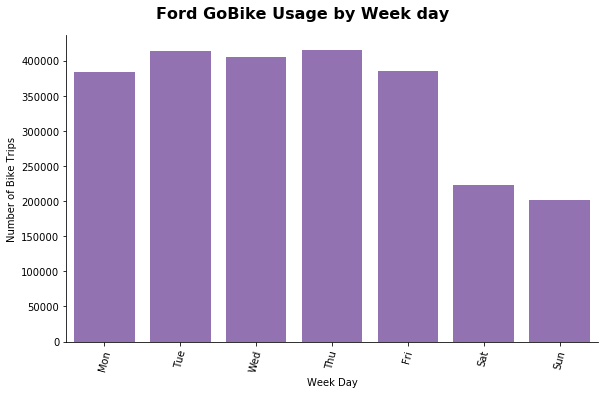

In [78]:
# Weekdays usage of the Ford Go Bike system
bar_graph_single_feature (df_bike_trips, feature='day_of_week', suptitle='Ford GoBike Usage by Week day', x_label='Week Day', xticks=week_day, sample=global_sample)

As expected, the working days: Mon-Fri shows higer utilization than weekends. This implies that riders are mainly using the bikes as part of their daily routine rather than for leasure.

#### Now what about the distribution over hours in workdays?

#### From the above curve. We can split the analysis to Week days Vs. Weekend. I.e.: We can select a subset of data and work on it

#### What about the hours distribution on weekdays?

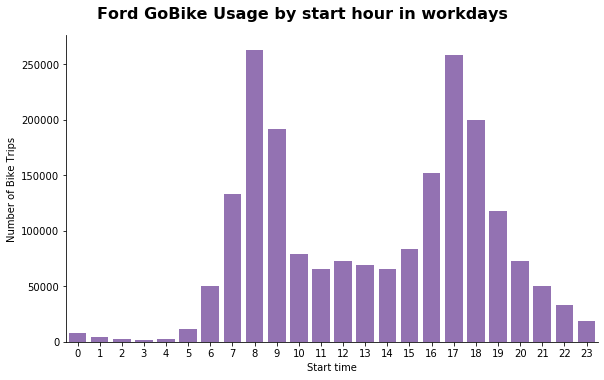

In [79]:
# Hourly distribution in workdays
bar_graph_single_feature (df_bike_trips[df_bike_trips.working_day == True], feature='hour_of_day', suptitle='Ford GoBike Usage by start hour in workdays', x_label='Start time', xticks='', sample=False)

#### As expected, two peaks: 7:00 - 9:00 am and 4:00 - 7:00 pm.  We can easily conclude that many are using it to go to work.
#### To confirm, let's put the weekends as well to see if this conclusion changes dramatically

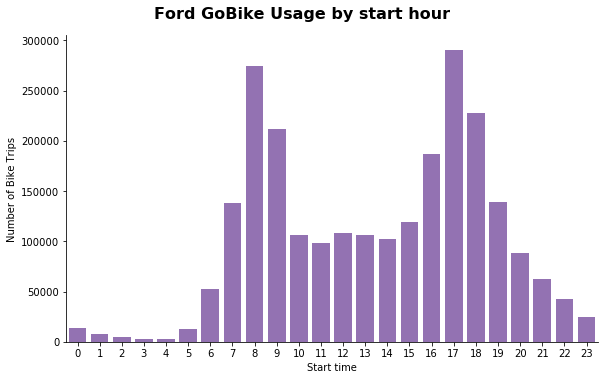

In [80]:
bar_graph_single_feature (df_bike_trips, feature='hour_of_day', suptitle='Ford GoBike Usage by start hour', x_label='Start time', xticks='', sample=False)

#### More or less it confirrms the finding. Most rides are to go and some back from work. If we include weekends, then we can see a slight decrease of 7:00 am as ppl have tendency to start later.

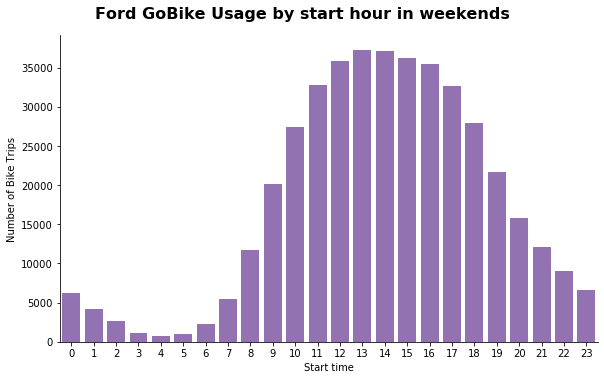

In [81]:
'''Extra cuver for weekends'''
bar_graph_single_feature (df_bike_trips[df_bike_trips.working_day == False], feature='hour_of_day', suptitle='Ford GoBike Usage by start hour in weekends', x_label='Start time', xticks='', sample=False)

### From above, we can guess that subscribers are our major customers. Let's check this:

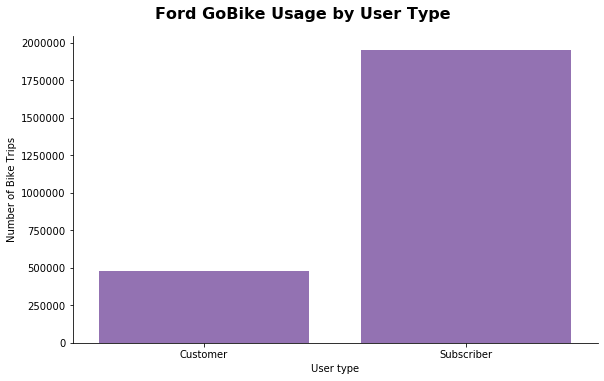

In [82]:
bar_graph_single_feature (df_bike_trips, feature='user_type', suptitle='Ford GoBike Usage by User Type', x_label='User type', xticks='', sample=False)

In [83]:
'''Yes most of our users are Subscribers. Let's see the same on a pie chart'''

"Yes most of our users are Subscribers. Let's see the same on a pie chart"

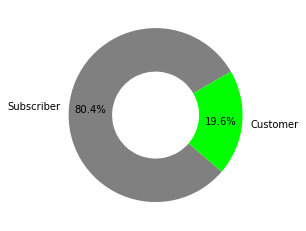

In [84]:
plt.pie(df_bike_trips['user_type'].value_counts(),
        autopct = '%1.1f%%',
        startangle = 30,
        labels = df_bike_trips['user_type'].value_counts().index,
        pctdistance = 0.75,
        wedgeprops = {'width' : 0.5},
       colors=
           ['gray', 'lime']);

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Let's move to the rides. How long does it take?

In [85]:
df_bike_trips.duration_min.describe()

count    2.426322e+06
mean     1.339624e+01
std      3.169656e+01
min      1.000000e+00
25%      5.966667e+00
50%      9.483333e+00
75%      1.471667e+01
max      1.437167e+03
Name: duration_min, dtype: float64

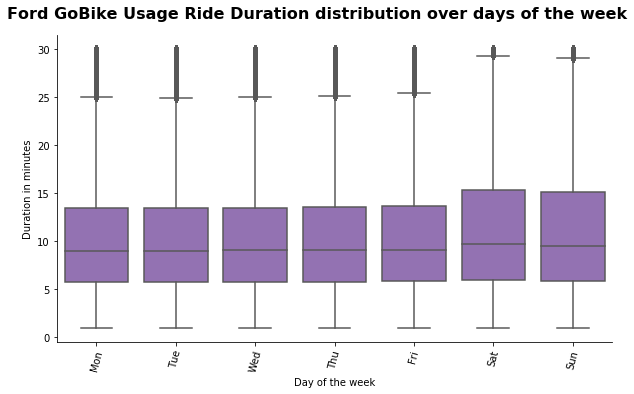

In [86]:
base_color = sb.color_palette()[4]
graph = sb.catplot(data = df_bike_trips.query('duration_min < 30'),  x = 'day_of_week', y = 'duration_min',kind = 'box', aspect = 1.7, color = base_color);
graph.set_axis_labels('Day of the week', 'Duration in minutes'),
graph.fig.suptitle('Ford GoBike Usage Ride Duration distribution over days of the week', y = 1.05, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(week_day, rotation=75);

In [87]:
'''Most rides lasts for 10 - 15 minutes. With slightly longer rides over the weekend'''

'Most rides lasts for 10 - 15 minutes. With slightly longer rides over the weekend'

#### What about the distance travelled. Of course we cannot have accurate distance from the table. Instead we will use the ground distance.

In [88]:
df_bike_trips.ground_distance.describe()

count    2.426322e+06
mean     1.693577e+00
std      1.077108e+00
min      0.000000e+00
25%      9.304248e-01
50%      1.451572e+00
75%      2.227623e+00
max      6.946924e+01
Name: ground_distance, dtype: float64

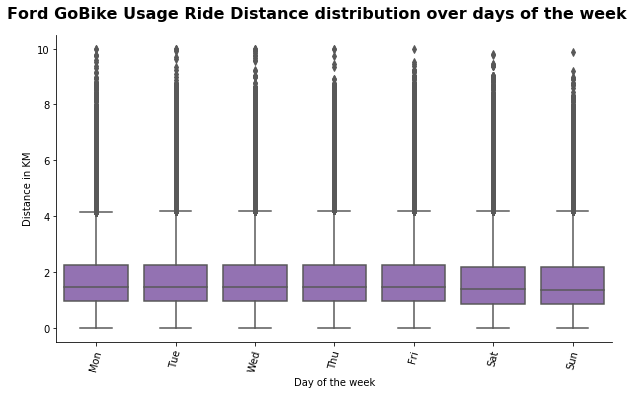

In [89]:
'''There seems to be some outliers - Let's get rid of them '''
graph = sb.catplot(data = df_bike_trips.query('ground_distance < 10'),  x = 'day_of_week', y = 'ground_distance',kind = 'box', aspect = 1.7, color = base_color);
graph.set_axis_labels('Day of the week', 'Distance in KM'),
graph.fig.suptitle('Ford GoBike Usage Ride Distance distribution over days of the week', y = 1.05, fontsize = 16, fontweight = 'bold');
graph.set_xticklabels(week_day, rotation=75);

In [90]:
'''Nothing unusual here. Usually rides are between 1-2 KM'''

'Nothing unusual here. Usually rides are between 1-2 KM'

#### Let's see from where to where riders go. 
##### There are many stations. We will not be able to easily detect a pattern
##### We selected the most busiest 6 stations.
##### More precisely: We will focus in 2 time periods: 7-9 am and 4-6 pm.

In [91]:
# Here are the stations under study:
most_frequent_stations

['Market St at 10th St',
 'Berry St at 4th St',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Montgomery St BART Station (Market St at 2nd St)']

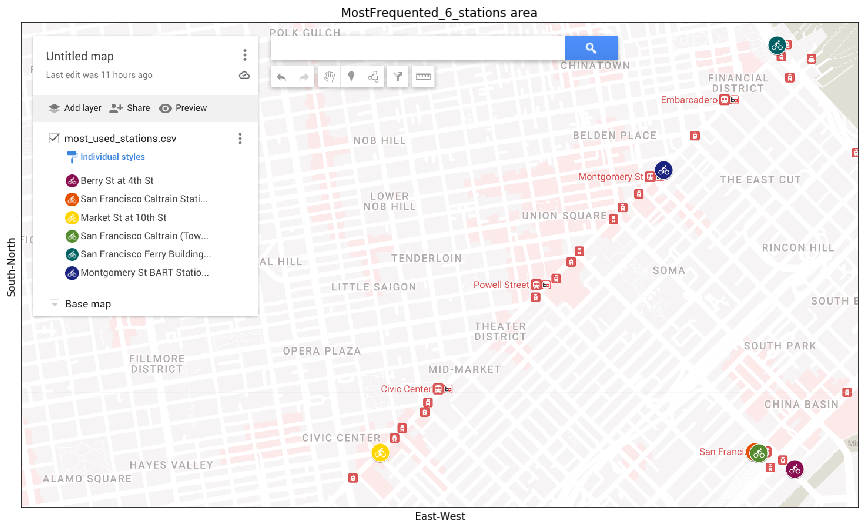

In [92]:
# Let's see where are those stations on the map and try to make some observations:
plot_img('MostFrequented_6_stations.png', 'MostFrequented_6_stations area')

##### We can see:
* 3 stations: Market st, Montgomery and Ferry building are along the main metro or sub-way line
* Ferry building is to communicate to the other side by ferries
* 3 other stations are concentrated around the rail way station (not clear enough in the above image)
* Also, not clear: There is a ride that must be beatiful from Ferry station to the train station along the beach on the right....


In [93]:
def graph_stations_correlation(df, title):
    stations_correlation = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
    stations_correlation_heatmap_pivotdata = stations_correlation.pivot(index='start_station_name', columns='end_station_name', values='count')
    '''Let's see the values first'''
    stations_correlation.describe()
    f, ax = plt.subplots(figsize=(20, 20))

    plt.title(title, loc='left', fontsize=20, weight='bold');
    sb.heatmap(stations_correlation_heatmap_pivotdata, cmap ='Blues', linewidths = 0.30)
    ax.invert_yaxis()
    plt.xlabel('End Station', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Start Station', fontsize = 15) # y-axis label with fontsize 15

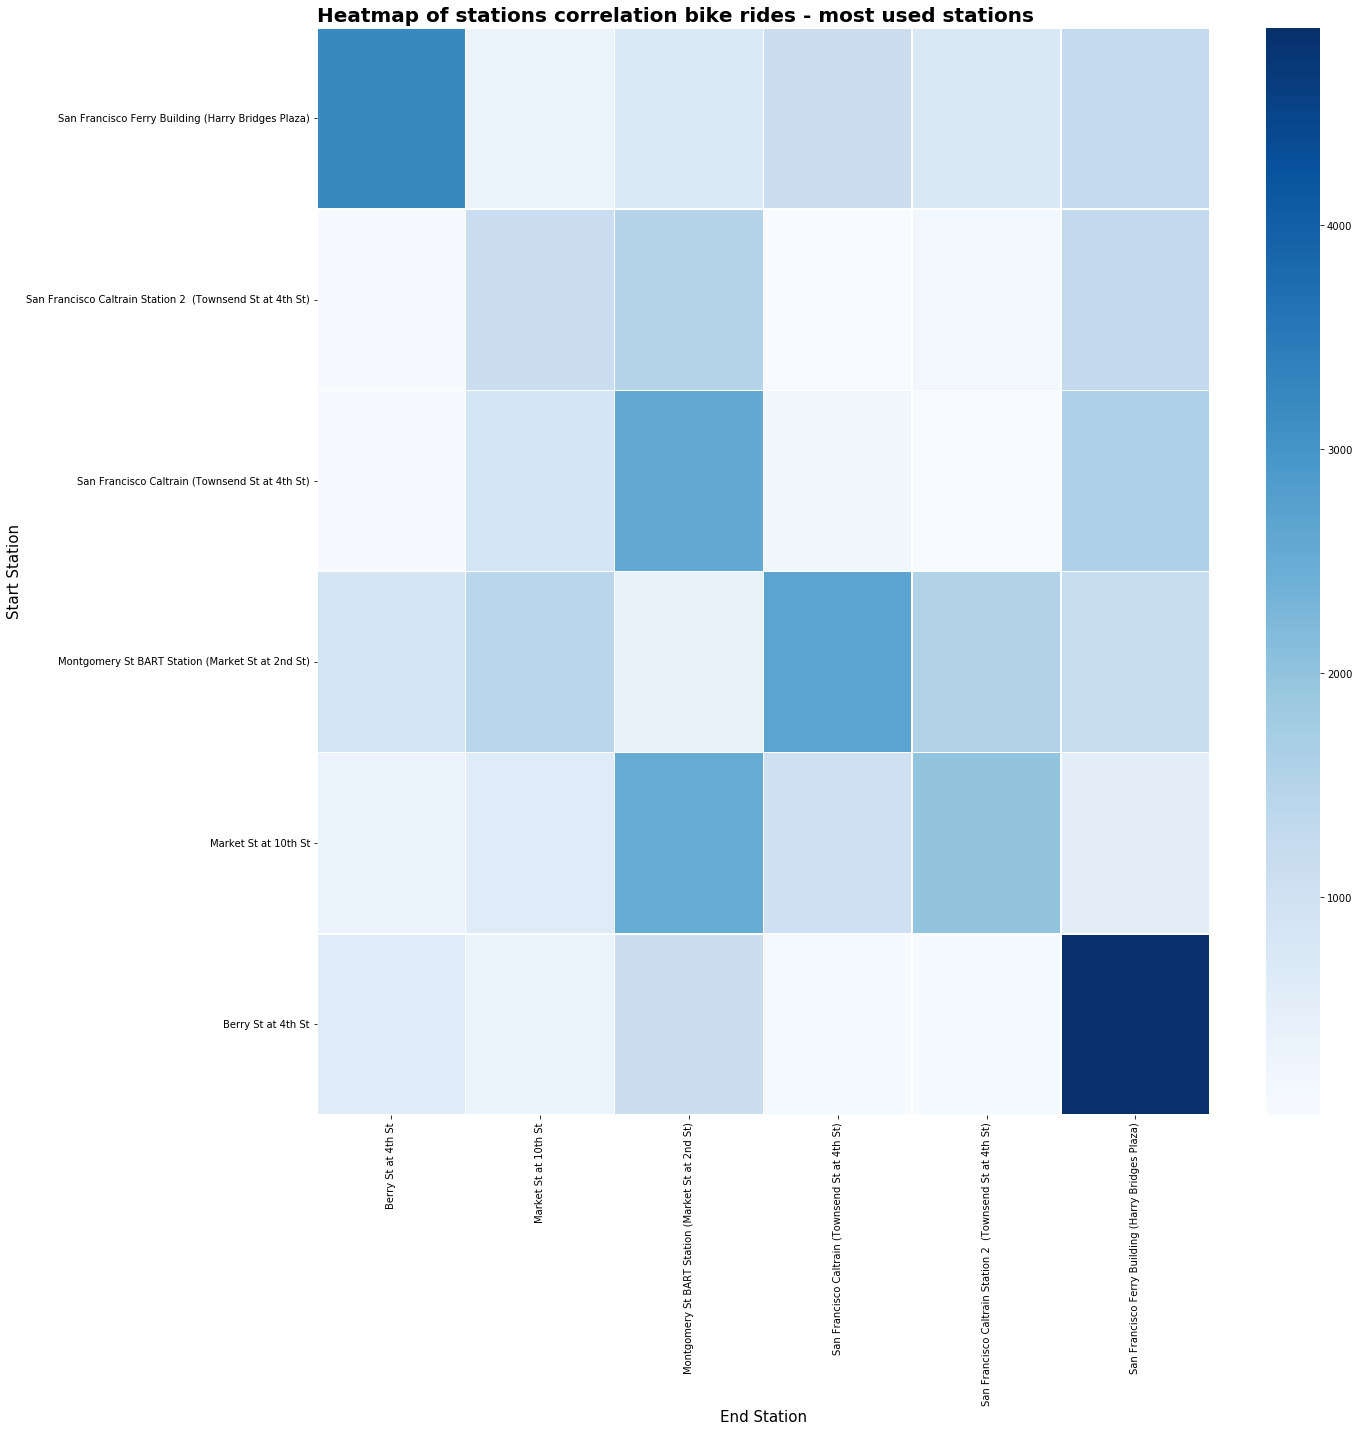

In [94]:
# Stations correlation: We will focus more on the 6 mosst frequently used stations. 
# Similar analysis could be done for stations in each city
df_bike_trips_most_used_stations = df_bike_trips[(df_bike_trips.start_station_name.isin(most_frequent_stations)) & (df_bike_trips.end_station_name.isin(most_frequent_stations))]
graph_stations_correlation(df_bike_trips_most_used_stations, 'Heatmap of stations correlation bike rides - most used stations')


##### From above: 
* The 45 degree line, depects the same start and end station. This should be light color and it is
* For perfect utilization, there should be a symmetry over the 45 degree line. This indicates that almost same number of ppl are travelling from one station to the other both ways. i.e.: No need to transport bikes
* From above. It's almost symmetrical

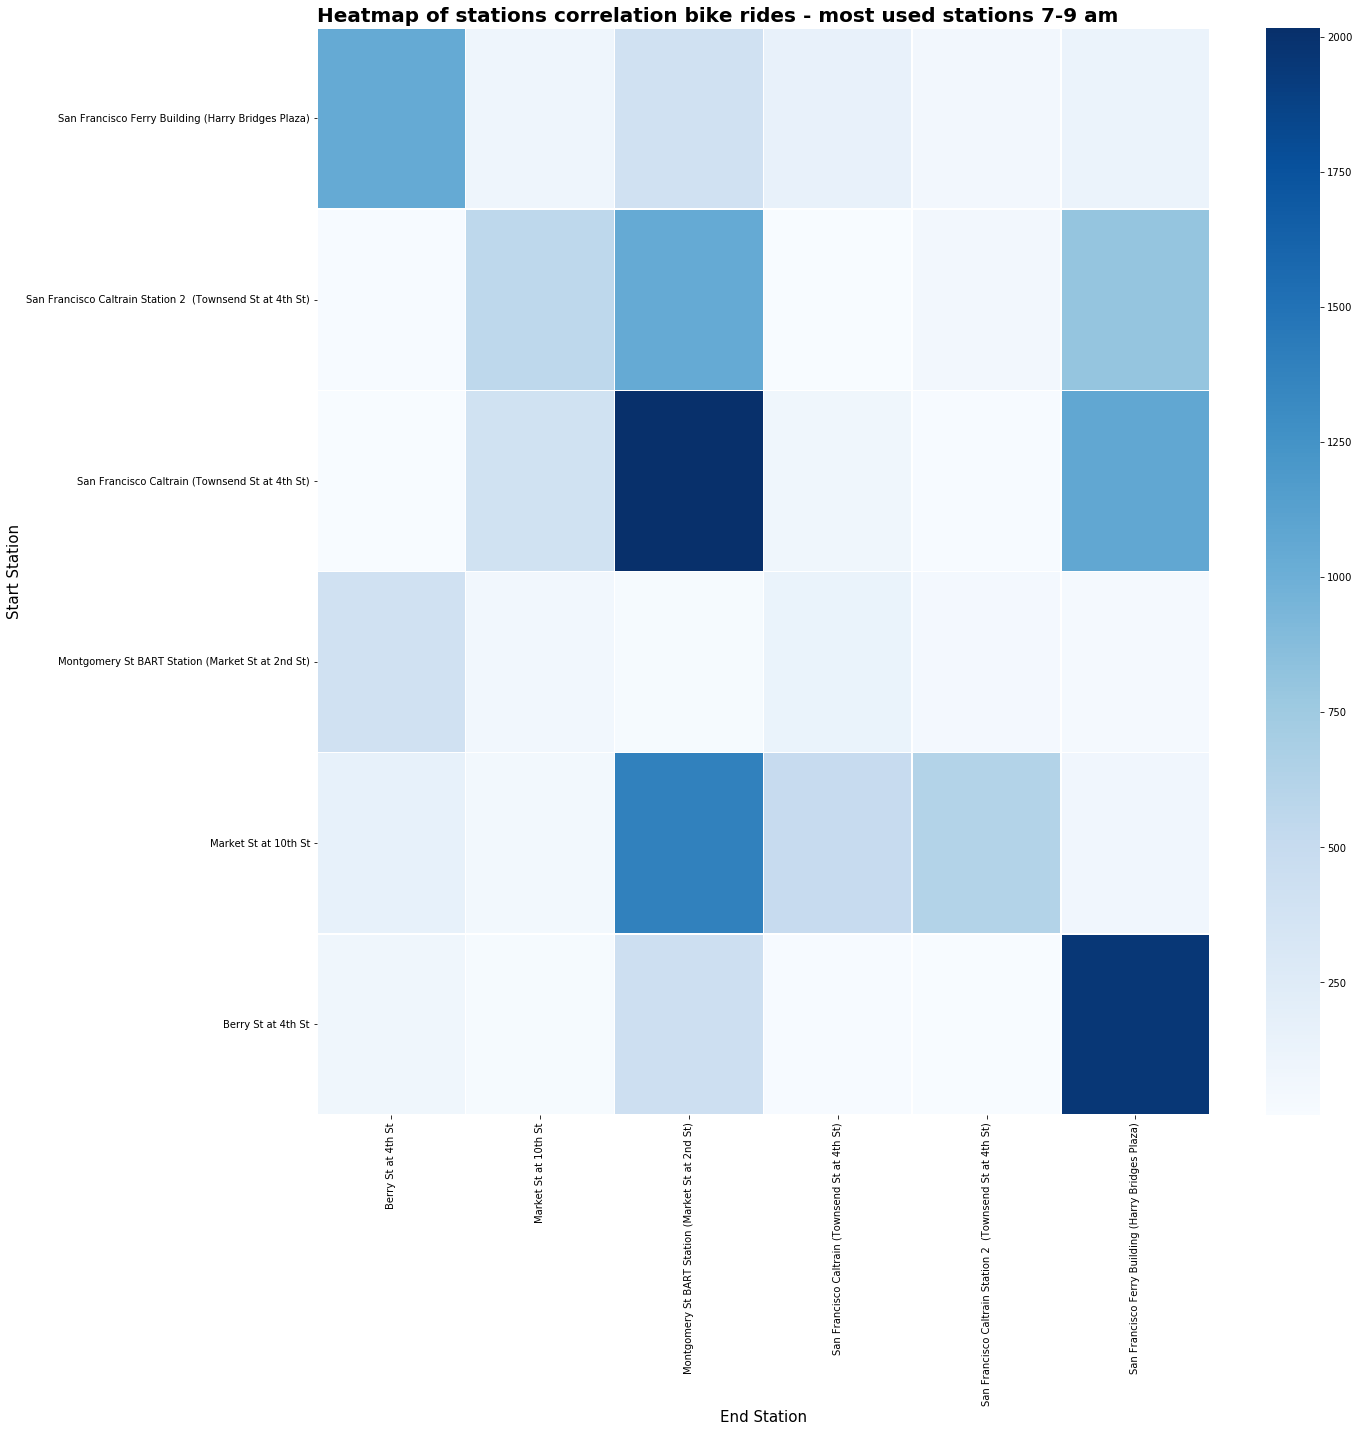

In [95]:
# Now let's see the same at am:
df_am = df_bike_trips_most_used_stations[(df_bike_trips_most_used_stations.hour_of_day >= 7) & (df_bike_trips_most_used_stations.hour_of_day <= 9)]
graph_stations_correlation(df_am, 'Heatmap of stations correlation bike rides - most used stations 7-9 am')

##### Observations:
* It's mostly symmetrical except for 2 stations: **Montgomery St BART Station (Market St at 2nd St)** and **San Francisco Caltrain (Townsend St at 4th St)**
* Compare 3rd row with 3rd column for: Montgomery St BART Station (Market St at 2nd St)
* Compare 4th row with 4th column for: San Francisco Caltrain (Townsend St at 4th St)

##### Conclusion:
* There are much more rides from **San Francisco Caltrain (Townsend St at 4th St)** to **Montgomery St BART Station (Market St at 2nd St)** from 7-9 am than the opposit.
* This means, we need to transport the bikes (by a truck or so) bake to **San Francisco Caltrain (Townsend St at 4th St)**

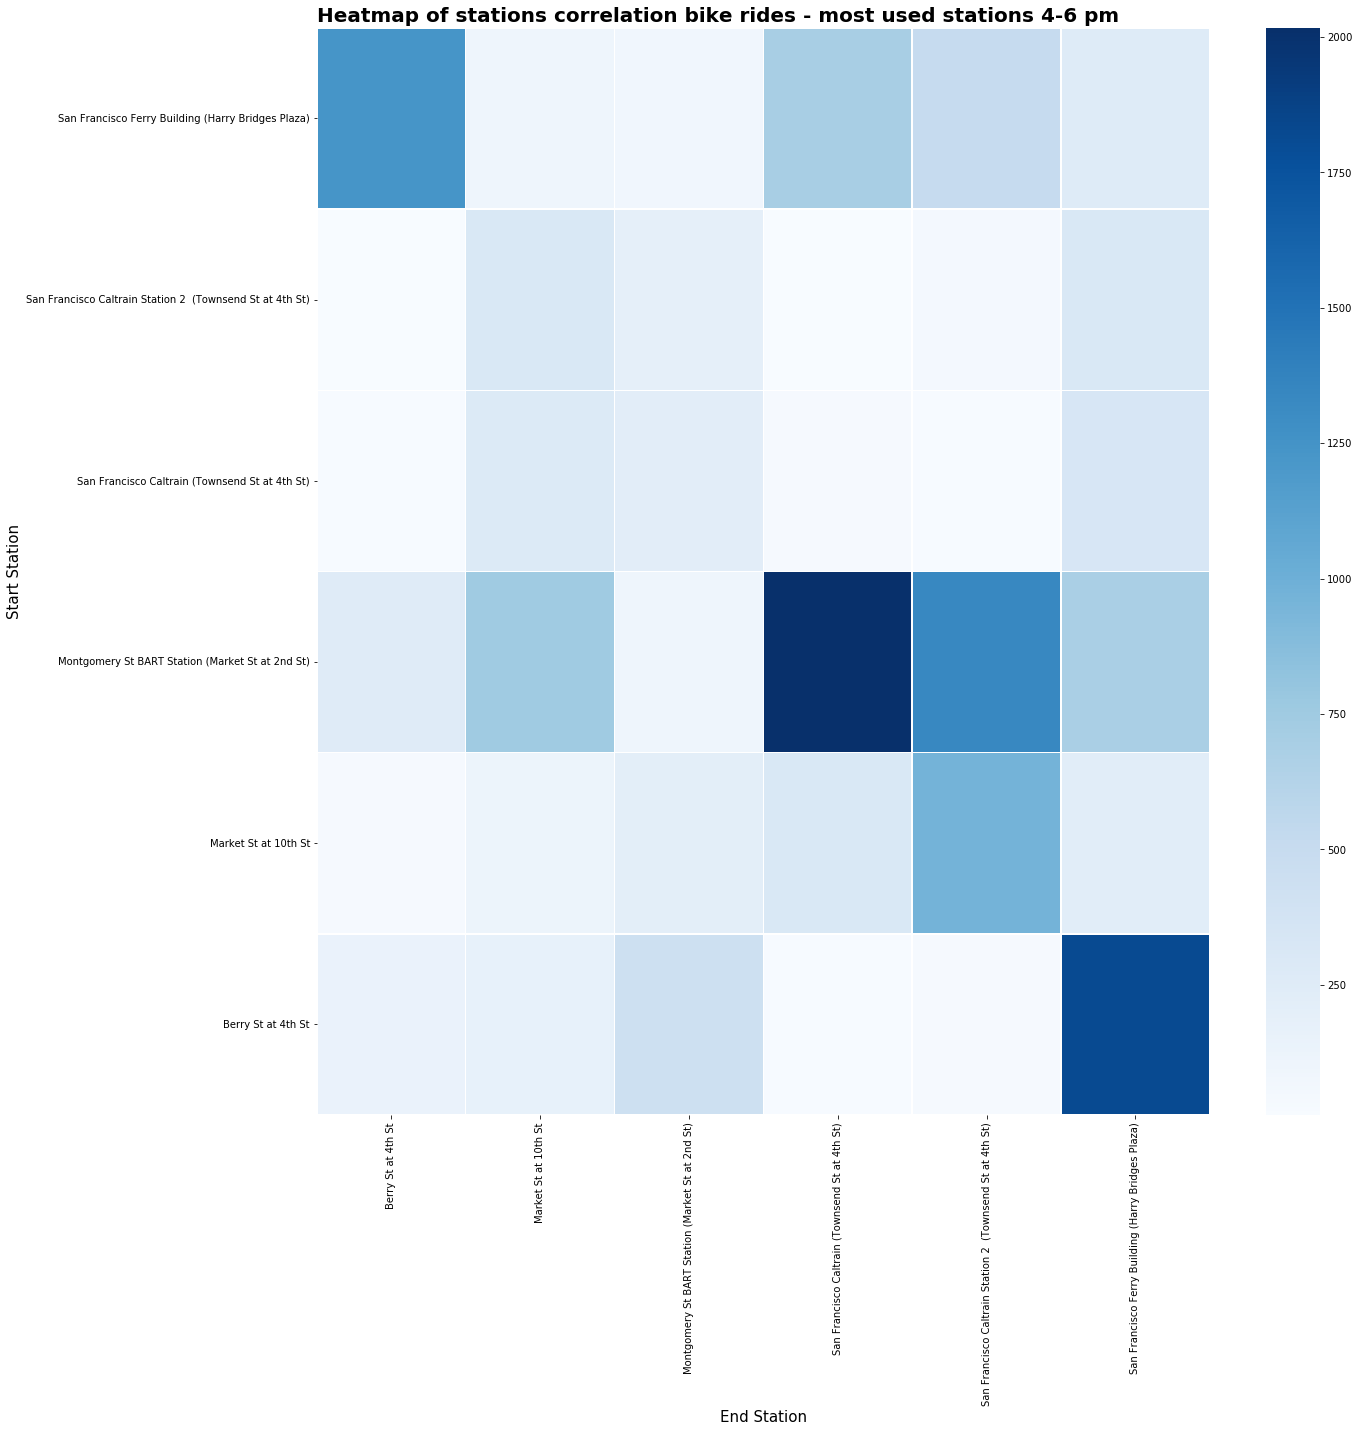

In [96]:
# Now let's see the same at pm: It should be the opposit
df_pm = df_bike_trips_most_used_stations[(df_bike_trips_most_used_stations.hour_of_day >= 16) & (df_bike_trips_most_used_stations.hour_of_day <= 18)]
graph_stations_correlation(df_pm, 'Heatmap of stations correlation bike rides - most used stations 4-6 pm')

##### Observations:
* As expected. It's the opposit. We need to do the reverse at pm

In [97]:
st = 'Montgomery St BART Station (Market St at 2nd St)'
ed = 'San Francisco Caltrain (Townsend St at 4th St)'
df = df_am
name = 'AM'

print(f'{name}: From: {st} To :{ed}:\n\t {len(df[(df.start_station_name == st) & (df.end_station_name == ed)])}')
print(f'{name}: From: {ed} To :{st}:\n\t {len(df[(df.start_station_name == ed) & (df.end_station_name == st)])}')

df = df_pm
name = 'PM'
print(f'{name}: From: {st} To :{ed}:\n\t {len(df[(df.start_station_name == st) & (df.end_station_name == ed)])}')
print(f'{name}: From: {ed} To :{st}:\n\t {len(df[(df.start_station_name == ed) & (df.end_station_name == st)])}')

AM: From: Montgomery St BART Station (Market St at 2nd St) To :San Francisco Caltrain (Townsend St at 4th St):
	 132
AM: From: San Francisco Caltrain (Townsend St at 4th St) To :Montgomery St BART Station (Market St at 2nd St):
	 2017
PM: From: Montgomery St BART Station (Market St at 2nd St) To :San Francisco Caltrain (Townsend St at 4th St):
	 2017
PM: From: San Francisco Caltrain (Townsend St at 4th St) To :Montgomery St BART Station (Market St at 2nd St):
	 221


Text(0, 0.5, 'Trip Duration in Minute')

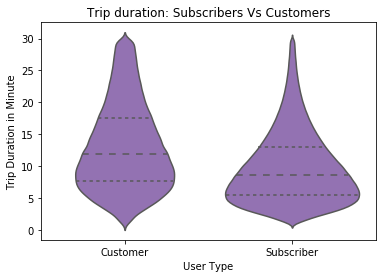

In [98]:
#### Another look for the trip duration.  
baseColor = sb.color_palette()[4]
sb.violinplot(data=df_bike_trips[df_bike_trips.duration_min<30], x='user_type', y='duration_min', color=baseColor, inner='quartile')
plt.title('Trip duration: Subscribers Vs Customers')
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Minute')

In [99]:
'''Usually Subscribers have a shorter duration than Customers. Also, they are mainly focussed (lower std): 5-13 minutes '''

'Usually Subscribers have a shorter duration than Customers. Also, they are mainly focussed (lower std): 5-13 minutes '

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Text(0, 0.5, 'Duration (min)')

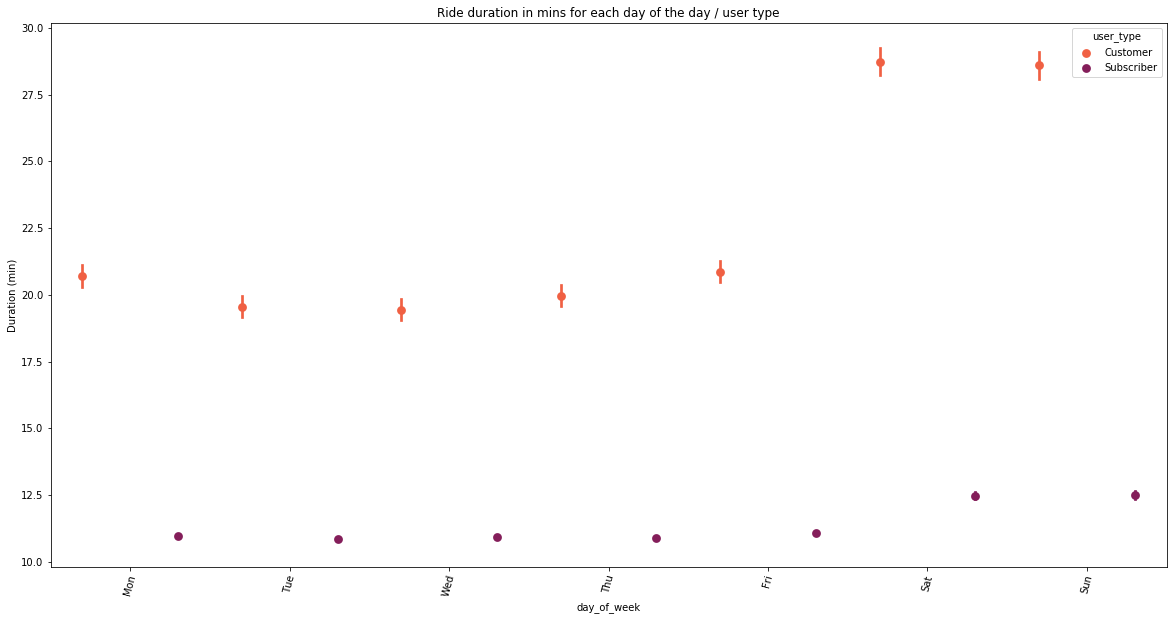

In [100]:
fig = plt.figure(figsize = [20, 10])

ax = sb.pointplot(data=df_bike_trips,
                  x = 'day_of_week',
                  y = 'duration_min',
                  hue = 'user_type',
                  palette = 'rocket_r',
                  linestyles = '',
                  dodge = 0.6)

ax.set_xticklabels(week_day, rotation=75)
plt.title('Ride duration in mins for each day of the day / user type')
plt.ylabel('Duration (min)')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> For subscribers the duration is almost constant throughout the week. For Customer there is an increase in duration with slightly higher variance during weekend

### Were there any interesting or surprising interactions between features?

> Different behavior over the weekend for a certain type of user. We may want to investigate more to support our operation and provide the bikes when and where they are needed. 

## Conclusions
> There are two main perspective of interst: Business Perspective and Operation Perspective.

> Business Perspective: Our main users are the Subscribers. They are mainly using it to go and come back to work. We can either promote more those kind of users or if we reach a good percentage of those users is to start focussing on the Customers

> Operation Perspective: We need to provide the best possible service and have the bikes available when and where needed. 
* For this we can see that we need to send more bikes to the following station: `San Francisco Caltrain (Townsend St at 4th St)` in the morning during weekdays
* Those bikes can mainly come from the following station: `Montgomery St BART Station (Market St at 2nd St)`
* This is just an aexample on how can we support the operation. similar analysis needs to be done for other areas as well